In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from torch.autograd import Variable
import torch.nn as nn
import torchvision.transforms as tf
import seaborn as sns
from tqdm.notebook import tqdm
import torchvision.datasets as dts
from PIL import Image
import PIL.ImageOps

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print(device)

cuda


In [3]:
trnsform = tf.Compose([tf.ToTensor(), tf.Normalize((0.7,), (0.7,)),])
data_train=dts.MNIST(root='./Data', train=True, download=True, transform=trnsform)
data_test=dts.MNIST(root='./Data', train=False, download=True, transform=trnsform)

In [4]:
train_loader = torch.utils.data.DataLoader(data_train, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=10, shuffle=True)

In [5]:
class ANN_model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ANN_model,self).__init__()
        self.linear1 = nn.Linear(input_dim, 400)
        self.relu1 = nn.LeakyReLU()

        self.linear2 = nn.Linear(400, 100)
        self.tanh2 = nn.Tanh()

        self.linear3 = nn.Linear(100, 300)
        self.elu3 = nn.ELU()


        self.linear4 = nn.Linear(300,output_dim)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)

        out = self.linear2(out)
        out = self.tanh2(out)

        out = self.linear3(out)
        out = self.elu3(out)


        out = self.linear4(out)
        return out

In [6]:
#instatntiate ANN
input_dim = 28*28
output_dim = 10

#Create ANN
model = ANN_model(input_dim, output_dim).to(device)

#loss function
error = nn.CrossEntropyLoss()

#Optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.3)

In [7]:
# model training
count = 0
num_epochs = 10
accuracy = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    print(f'epoch: {epoch}')
    for i, (image, label) in tqdm(enumerate(train_loader)):
        train = Variable(image.view(-1,28*28)).to(device)
        label = Variable(label).to(device)

        #Clear gradient
        optimizer.zero_grad()

        #Forward propagation
        result = model(train)

        #Calculate softmax and cross entropy loss
        loss = error(result, label)

        #Calculating gradients
        loss.backward()

        #upadate parameters
        optimizer.step()

        count+=1

        #if count % 500 == 0:
            #Calculate Accuracy
        #    correct = 0
        #    total = 0
            # Predict test dataset
        #    for image, label in test_loader:
            #    test = Variable(image.view(-1, 28*28))
                #Forward propagation
            #    output = model(test)

                #Get maximum value
            #    predict = torch.max(output.data, 1)[1]

                #Total number of labels
            #    total += len(label)

                #Total correct predictions
            #    correct += (predict==label).sum()

            #accuracy += 100 * correct / float(total)

        #store loss and iteration
        loss_list.append(loss.data)
        iteration_list.append(count)
        #accuracy_list.append(accuracy)

        #if count % 10 == 0:
        #Print Loss
        #    print('Iteration: {}  Loss: {}'.format(count, loss.data))
        #print(f'---Model calculated---\nloss: {loss_list[count-1]}')

epoch: 0


0it [00:00, ?it/s]

epoch: 1


0it [00:00, ?it/s]

epoch: 2


0it [00:00, ?it/s]

epoch: 3


0it [00:00, ?it/s]

epoch: 4


0it [00:00, ?it/s]

epoch: 5


0it [00:00, ?it/s]

epoch: 6


0it [00:00, ?it/s]

epoch: 7


0it [00:00, ?it/s]

epoch: 8


0it [00:00, ?it/s]

epoch: 9


0it [00:00, ?it/s]

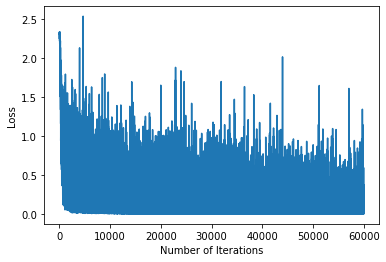

0.014376930892467499

In [8]:
loss_list_cpu = torch.tensor(loss_list, device = 'cpu')
plt.plot(range(count),loss_list_cpu)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()
loss_list[count-1].item()

In [10]:
accuracy = 0
iteration_list = []
accuracy_list = []

#Calculate Accuracy
correct = 0
total = 0
# Predict test dataset
for image, label in test_loader:
    test = Variable(image.view(-1, 28*28)).to(device)
    label = Variable(label).to(device)
    #Forward propagation
    output = model(test)

    #Get maximum value
    predict = torch.max(output.data, 1)[1]

    #Total number of labels
    total += len(label)

    #Total correct predictions
    correct += (predict==label).sum()

accuracy += 100 * correct / float(total)

#store loss and iteration
accuracy_list.append(accuracy)
print('accuracy: {:.2f} %'.format(accuracy))

accuracy: 97.56 %
